In [1]:
# We will need some functionality 
from typing import List 

# and from math related libraries
import numpy as np
import qutip as qt

# and from qiskit
from qiskit.extensions import HamiltonianGate
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute
from qiskit.circuit import Parameter
from qiskit.providers.aer import QasmSimulator
from qiskit.quantum_info import Operator
import pylab

from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA, ADAM
from qiskit.circuit.library import TwoLocal
from qiskit.opflow import I, X, Z ,Y

In [2]:
from numbers import Number
import numpy

from qiskit.circuit import Gate, QuantumCircuit, QuantumRegister, ParameterExpression
from qiskit.quantum_info.operators.predicates import matrix_equal
from qiskit.quantum_info.operators.predicates import is_hermitian_matrix
from qiskit.extensions.exceptions import ExtensionError
from qiskit.circuit.exceptions import CircuitError

from qiskit.circuit import Parameter, QuantumCircuit, QuantumRegister 


from qiskit.extensions.unitary import UnitaryGate

# This code is based on https://github.com/Qiskit/qiskit-terra/blob/main/qiskit/extensions/hamiltonian_gate.py licenced under Apache licence.
class CustomHamiltonianGate(Gate):
    def __init__(self, time, num_qubits, connectivity, h_coeff0,h_coeff1,h_coeff2,h_coeff3,h_coeff4, label=None):
        if isinstance(time, Number) and time != numpy.real(time):
            raise ExtensionError("Evolution time is not real.")
       
        self.num_qubits = num_qubits
        self.connectivity = connectivity
        # Store instruction params
        super().__init__("custom_hamiltonian", num_qubits, [time, num_qubits, connectivity, h_coeff0,h_coeff1,h_coeff2,h_coeff3,h_coeff4], label=label)

    def __array__(self, dtype=None):
        """Return matrix for the unitary."""
        # pylint: disable=unused-argument
        import scipy.linalg

        try:
            return scipy.linalg.expm(-1j * self.get_ham() * float(self.params[0]))
        except TypeError as ex:
            raise TypeError(
                "Unable to generate Unitary matrix for "
                "unbound t parameter {}".format(self.params[1])
            ) from ex

    def _define(self):
        """Calculate a subcircuit that implements this unitary."""
        q = QuantumRegister(self.num_qubits, "q")
        qc = QuantumCircuit(q, name=self.name)
        qc._append(UnitaryGate(self.to_matrix()), q[:], [])
        self.definition = qc

    def validate_parameter(self, parameter):
        return parameter

    def get_ham(self):
        dim = 2 ** self.num_qubits
        num_connections = len(self.connectivity)
        zz_hamiltonian = np.zeros([dim, dim], dtype=np.complex128)

        for c in range(num_connections):
            ops_to_tensor = [qt.identity(2)] * self.num_qubits
            ops_to_tensor[self.connectivity[c][0]] = qt.sigmaz()
            ops_to_tensor[self.connectivity[c][1]] = qt.sigmaz()
            zz_hamiltonian += float(self.params[3+c]) * np.array(qt.tensor(ops_to_tensor)) #+= 

        return zz_hamiltonian

def custom_hamiltonian(self, time, connectivity, h_coeff0,h_coeff1,h_coeff2,h_coeff3,h_coeff4, qubits, label=None):
    """Apply hamiltonian evolution to qubits."""
    if not isinstance(qubits, list):
        qubits = [qubits]

    return self.append(CustomHamiltonianGate(time=time, num_qubits =len(qubits), connectivity=connectivity, h_coeff0=h_coeff0,h_coeff1=h_coeff1,h_coeff2 = h_coeff2,h_coeff3 = h_coeff3,h_coeff4= h_coeff4,label=label), qubits, [])
QuantumCircuit.custom_hamiltonian = custom_hamiltonian
from qiskit.circuit import  ParameterVector

In [3]:
from numbers import Number
import numpy

from qiskit.circuit import Gate, QuantumCircuit, QuantumRegister, ParameterExpression
from qiskit.quantum_info.operators.predicates import matrix_equal
from qiskit.quantum_info.operators.predicates import is_hermitian_matrix
from qiskit.extensions.exceptions import ExtensionError
from qiskit.circuit.exceptions import CircuitError

from qiskit.circuit import Parameter, QuantumCircuit, QuantumRegister 


from qiskit.extensions.unitary import UnitaryGate

# This code is based on https://github.com/Qiskit/qiskit-terra/blob/main/qiskit/extensions/hamiltonian_gate.py licenced under Apache licence.
class CustomHamiltonianGate1(Gate):
    def __init__(self, time, num_qubits, connectivity, h_coeff0,h_coeff1,h_coeff2,h_coeff3,h_coeff4, label=None):
        if isinstance(time, Number) and time != numpy.real(time):
            raise ExtensionError("Evolution time is not real.")
       
        self.num_qubits = num_qubits
        self.connectivity = connectivity
        # Store instruction params
        super().__init__("custom_hamiltonian1", num_qubits, [time, num_qubits, connectivity, h_coeff0,h_coeff1,h_coeff2,h_coeff3,h_coeff4], label=label)

    def __array__(self, dtype=None):
        """Return matrix for the unitary."""
        # pylint: disable=unused-argument
        import scipy.linalg

        try:
            return scipy.linalg.expm(-1j * self.get_ham() * float(self.params[0]))
        except TypeError as ex:
            raise TypeError(
                "Unable to generate Unitary matrix for "
                "unbound t parameter {}".format(self.params[1])
            ) from ex

    def _define(self):
        """Calculate a subcircuit that implements this unitary."""
        q = QuantumRegister(self.num_qubits, "q")
        qc = QuantumCircuit(q, name=self.name)
        qc._append(UnitaryGate(self.to_matrix()), q[:], [])
        self.definition = qc

    def validate_parameter(self, parameter):
        return parameter

    def get_ham(self):
        dim = 2 ** self.num_qubits
        num_connections = len(self.connectivity)
        zz_hamiltonian = np.zeros([dim, dim], dtype=np.complex128)

        for c in range(num_connections):
            ops_to_tensor = [qt.identity(2)] * self.num_qubits
            ops_to_tensor[self.connectivity[c][0]] = qt.sigmax()
            ops_to_tensor[self.connectivity[c][1]] = qt.sigmax()
            zz_hamiltonian += float(self.params[3+c]) * np.array(qt.tensor(ops_to_tensor)) #+= 

        return zz_hamiltonian

def custom_hamiltonian1(self, time, connectivity, h_coeff0,h_coeff1,h_coeff2,h_coeff3,h_coeff4, qubits, label=None):
    """Apply hamiltonian evolution to qubits."""
    if not isinstance(qubits, list):
        qubits = [qubits]

    return self.append(CustomHamiltonianGate1(time=time, num_qubits =len(qubits), connectivity=connectivity, h_coeff0=h_coeff0,h_coeff1=h_coeff1,h_coeff2 = h_coeff2,h_coeff3 = h_coeff3,h_coeff4= h_coeff4,label=label), qubits, [])
QuantumCircuit.custom_hamiltonian1 = custom_hamiltonian1
from qiskit.circuit import  ParameterVector

In [4]:
from numbers import Number
import numpy

from qiskit.circuit import Gate, QuantumCircuit, QuantumRegister, ParameterExpression
from qiskit.quantum_info.operators.predicates import matrix_equal
from qiskit.quantum_info.operators.predicates import is_hermitian_matrix
from qiskit.extensions.exceptions import ExtensionError
from qiskit.circuit.exceptions import CircuitError

from qiskit.circuit import Parameter, QuantumCircuit, QuantumRegister 


from qiskit.extensions.unitary import UnitaryGate

# This code is based on https://github.com/Qiskit/qiskit-terra/blob/main/qiskit/extensions/hamiltonian_gate.py licenced under Apache licence.
class CustomHamiltonianGate2(Gate):
    def __init__(self, time, num_qubits, connectivity, h_coeff0,h_coeff1, label=None):
        if isinstance(time, Number) and time != numpy.real(time):
            raise ExtensionError("Evolution time is not real.")
       
        self.num_qubits = num_qubits
        self.connectivity = connectivity
        # Store instruction params
        super().__init__("custom_hamiltonian2", num_qubits, [time, num_qubits, connectivity, h_coeff0,h_coeff1], label=label)

    def __array__(self, dtype=None):
        """Return matrix for the unitary."""
        # pylint: disable=unused-argument
        import scipy.linalg

        try:
            return scipy.linalg.expm(-1j * self.get_ham() * float(self.params[0]))
        except TypeError as ex:
            raise TypeError(
                "Unable to generate Unitary matrix for "
                "unbound t parameter {}".format(self.params[1])
            ) from ex

    def _define(self):
        """Calculate a subcircuit that implements this unitary."""
        q = QuantumRegister(self.num_qubits, "q")
        qc = QuantumCircuit(q, name=self.name)
        qc._append(UnitaryGate(self.to_matrix()), q[:], [])
        self.definition = qc

    def validate_parameter(self, parameter):
        return parameter

    def get_ham(self):
        dim = 2 ** self.num_qubits
        num_connections1 = len(self.connectivity[0])
        num_connections2 = len(self.connectivity[1])
        zz_hamiltonian = np.zeros([dim, dim], dtype=np.complex128)

        for c in range(num_connections1):
            ops_to_tensor = [qt.identity(2)] * self.num_qubits
            ops_to_tensor[self.connectivity[0][c][0]] = qt.sigmaz()
            ops_to_tensor[self.connectivity[0][c][1]] = qt.sigmaz()
            zz_hamiltonian += float(self.params[3]) * np.array(qt.tensor(ops_to_tensor)) #+= 
        for c in range(num_connections2):
            ops_to_tensor = [qt.identity(2)] * self.num_qubits
            ops_to_tensor[self.connectivity[1][c][0]] = qt.sigmaz()
            ops_to_tensor[self.connectivity[1][c][1]] = qt.sigmaz()
            ops_to_tensor[self.connectivity[1][c][2]] = qt.sigmaz()
            zz_hamiltonian += float(self.params[4]) * np.array(qt.tensor(ops_to_tensor)) 
        return zz_hamiltonian

def custom_hamiltonian2(self, time, connectivity, h_coeff0,h_coeff1, qubits, label=None):
    """Apply hamiltonian evolution to qubits."""
    if not isinstance(qubits, list):
        qubits = [qubits]

    return self.append(CustomHamiltonianGate2(time=time, num_qubits =len(qubits), connectivity=connectivity, h_coeff0=h_coeff0,h_coeff1=h_coeff1,label=label), qubits, [])
QuantumCircuit.custom_hamiltonian2 = custom_hamiltonian2
from qiskit.circuit import  ParameterVector

In [5]:
from numbers import Number
import numpy

from qiskit.circuit import Gate, QuantumCircuit, QuantumRegister, ParameterExpression
from qiskit.quantum_info.operators.predicates import matrix_equal
from qiskit.quantum_info.operators.predicates import is_hermitian_matrix
from qiskit.extensions.exceptions import ExtensionError
from qiskit.circuit.exceptions import CircuitError

from qiskit.circuit import Parameter, QuantumCircuit, QuantumRegister 


from qiskit.extensions.unitary import UnitaryGate

# This code is based on https://github.com/Qiskit/qiskit-terra/blob/main/qiskit/extensions/hamiltonian_gate.py licenced under Apache licence.
class CustomHamiltonianGate3(Gate):
    def __init__(self, time, num_qubits, connectivity, h_coeff0,h_coeff1,h_coeff2, label=None):
        if isinstance(time, Number) and time != numpy.real(time):
            raise ExtensionError("Evolution time is not real.")
       
        self.num_qubits = num_qubits
        self.connectivity = connectivity
        # Store instruction params
        super().__init__("custom_hamiltonian3", num_qubits, [time, num_qubits, connectivity, h_coeff0,h_coeff1,h_coeff2], label=label)

    def __array__(self, dtype=None):
        """Return matrix for the unitary."""
        # pylint: disable=unused-argument
        import scipy.linalg

        try:
            return scipy.linalg.expm(-1j * self.get_ham() * float(self.params[0]))
        except TypeError as ex:
            raise TypeError(
                "Unable to generate Unitary matrix for "
                "unbound t parameter {}".format(self.params[1])
            ) from ex

    def _define(self):
        """Calculate a subcircuit that implements this unitary."""
        q = QuantumRegister(self.num_qubits, "q")
        qc = QuantumCircuit(q, name=self.name)
        qc._append(UnitaryGate(self.to_matrix()), q[:], [])
        self.definition = qc

    def validate_parameter(self, parameter):
        return parameter

    def get_ham(self):
        dim = 2 ** self.num_qubits
        num_connections1 = len(self.connectivity[0])
        num_connections2 = len(self.connectivity[1])
        num_connections3 = len(self.connectivity[2])
        zz_hamiltonian = np.zeros([dim, dim], dtype=np.complex128)

        for c in range(num_connections1):
            ops_to_tensor = [qt.identity(2)] * self.num_qubits
            ops_to_tensor[self.connectivity[0][c][0]] = qt.sigmax()
            ops_to_tensor[self.connectivity[0][c][1]] = qt.sigmax()
            zz_hamiltonian += float(self.params[3]) * np.array(qt.tensor(ops_to_tensor)) #+= 
        for c in range(num_connections2):
            ops_to_tensor = [qt.identity(2)] * self.num_qubits
            ops_to_tensor[self.connectivity[1][c][0]] = qt.sigmay()
            ops_to_tensor[self.connectivity[1][c][1]] = qt.sigmay()
            zz_hamiltonian += float(self.params[4]) * np.array(qt.tensor(ops_to_tensor))
        for c in range(num_connections3):
            ops_to_tensor = [qt.identity(2)] * self.num_qubits
            ops_to_tensor[self.connectivity[2][c][0]] = qt.sigmaz()
            ops_to_tensor[self.connectivity[2][c][1]] = qt.sigmaz()
            zz_hamiltonian += float(self.params[5]) * np.array(qt.tensor(ops_to_tensor))
        return zz_hamiltonian

def custom_hamiltonian3(self, time, connectivity, h_coeff0,h_coeff1,h_coeff2, qubits, label=None):
    """Apply hamiltonian evolution to qubits."""
    if not isinstance(qubits, list):
        qubits = [qubits]

    return self.append(CustomHamiltonianGate3(time=time, num_qubits =len(qubits), connectivity=connectivity, h_coeff0=h_coeff0,h_coeff1=h_coeff1,h_coeff2 = h_coeff2,label=label), qubits, [])
QuantumCircuit.custom_hamiltonian3 = custom_hamiltonian3
from qiskit.circuit import  ParameterVector

In [6]:
""" H2_op = (-1.052373245772859 * I ^ I) + \
        (0.39793742484318045 * I ^ Z) + \
        (-0.39793742484318045 * Z ^ I) + \
        (-0.01128010425623538 * Z ^ Z) + \
        (0.18093119978423156 * X ^ X) """
def H_heis3(num_qubits):
    # FILL YOUR CODE IN HERE
    H = 0
    #num_qubits = 3
    for i in range(num_qubits-1):
        H += (I^(num_qubits-i-2))^X^X^(I^i)
    for i in range(num_qubits-1):
        H += (I^(num_qubits-i-2))^Y^Y^(I^i)
    for i in range(num_qubits-1):
        H += (I^(num_qubits-i-2))^Z^Z^(I^i)
    # Return Hamiltonian
    return H
H2_op = H_heis3(5)
print(f'Number of qubits: {H2_op.num_qubits}')

Number of qubits: 5


In [38]:
""" t = Parameter('t')
num_qubits = H2_op.num_qubits
hamiltonian = create_zz_hamiltonian(num_qubits, [[[0, 1],[1,2]],[]], [[1.,1.],[]]) 
analog_block = HamiltonianGate(data=hamiltonian, time=t) """

In [7]:
npme = NumPyMinimumEigensolver()
result = npme.compute_minimum_eigenvalue(operator=H2_op)
ref_value = result.eigenvalue.real
print(f'Reference value: {ref_value:.5f}')

Reference value: -7.71155


In [95]:
seed = 69
iterations = 125
algorithm_globals.random_seed = seed
backend = Aer.get_backend('aer_simulator')
qi = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed) 

In [96]:
countsa = []
valuesa = []
def store_intermediate_resulta(eval_count, parameters, mean, std):
    countsa.append(eval_count)
    valuesa.append(mean)

In [97]:
countsa1 = []
valuesa1 = []
def store_intermediate_resulta1(eval_count, parameters, mean, std):
    countsa1.append(eval_count)
    valuesa1.append(mean)

In [99]:

countsa2 = []
valuesa2 = []
def store_intermediate_resulta2(eval_count, parameters, mean, std):
    countsa2.append(eval_count)
    valuesa2.append(mean)

In [100]:
countsa3 = []
valuesa3 = []
def store_intermediate_resulta3(eval_count, parameters, mean, std):
    countsa3.append(eval_count)
    valuesa3.append(mean)

In [101]:
countsa4 = []
valuesa4 = []
def store_intermediate_resulta4(eval_count, parameters, mean, std):
    countsa4.append(eval_count)
    valuesa4.append(mean)

In [102]:
countsa5 = []
valuesa5 = []
def store_intermediate_resulta5(eval_count, parameters, mean, std):
    countsa5.append(eval_count)
    valuesa5.append(mean)

In [124]:
countsa6 = []
valuesa6 = []
def store_intermediate_resulta6(eval_count, parameters, mean, std):
    countsa6.append(eval_count)
    valuesa6.append(mean)

In [104]:
countsa7 = []
valuesa7 = []
def store_intermediate_resulta7(eval_count, parameters, mean, std):
    countsa7.append(eval_count)
    valuesa7.append(mean)

In [125]:
countsa8 = []
valuesa8 = []
def store_intermediate_resulta8(eval_count, parameters, mean, std):
    countsa8.append(eval_count)
    valuesa8.append(mean)

In [147]:
countsa9 = []
valuesa9 = []
def store_intermediate_resulta9(eval_count, parameters, mean, std):
    countsa9.append(eval_count)
    valuesa9.append(mean)

In [107]:
countsa10 = []
valuesa10 = []
def store_intermediate_resulta10(eval_count, parameters, mean, std):
    countsa10.append(eval_count)
    valuesa10.append(mean)

In [108]:
countsa11 = []
valuesa11 = []
def store_intermediate_resulta11(eval_count, parameters, mean, std):
    countsa11.append(eval_count)
    valuesa11.append(mean)

- Take the problem hamiltonian as the analog gate
- choose different connectivities within the same layer
- Take inspiration from the kind of entanglement of the ansatz which worked in the digital vqe case
- Add ZZZ terms, linear star connectivities (also covered in point 2)
- Work explicitly for the Heisenberg hamiltonian as a case study
- Scope to work to play around with other hamiltonians like H2 (4 qubit case)/ T-Ising using the same ansatzes developed keeping Heisenberg Hamiltonian in mind (Those will require their own in depth analysis, but it seems plausible that if we are able to make something work for the Heisenberg case, the same heuristics can help in other cases)
- UNFORTUNATELY, t/h_coeffs cannot be parameterized for the Noisy case for n > 2 qubits hence after working things out for the noise-free case, we'll assign the optimal values for the same to the noisy case and hope things don't fall out
- WE use the same SPSA optimizer for all the our use cases (ADAM works fast but gives highly inaccurate results)
- Ansatzes which produce good results at small scale, may not work for larger scale. (vice versa)?

- Increasing the no. of Iterations can sometimes help escape a local minima
- Running the same ansatz again and again can sometime give highly varying results implying the existence of local minima and The seed not being fixed gives differing results
- Changing the kind and sequence of Rotation gates affects the Results.
- Increasing the number of layers need not mean getting a better ansatz, ansatz9 works the best even with lesser no. of parameters
- One possible reason why More "Complex" ansatzes fail to produce results which are closer to actual ones is because those ansatzes are "Stronger" in the sense that they gradient is "steeper" and hence often gets stuck in barren plateus
- I earlier tried parameterizing the h_coefficients but it seems that, by initializing all the coefficients to 1, it produces better results

#### Here we use A linear $(Z_jZ_{j+1})$ connectivity for n = 5 qubits (when h_coefficients were parameterized), seems to work better without

In [9]:
no_qubits = H2_op.num_qubits
nlayers = 2
# Create a quantum circuit that is used for the ansatz
qra = QuantumRegister(no_qubits)
ansatza = QuantumCircuit(qra)
tparamsa = []
hparamsa = []
#hmm = TwoLocal(num_qubits=H2_op.num_qubits,rotation_blocks=['rx','ry','rz'],entanglement_blocks=analog_block,reps=nlayers,insert_barriers=True)
for i in range(nlayers):
    tparamsa.append(ParameterVector(f"p{4*i}",1))
    hparamsa.append(ParameterVector(f"p{4*i+1}",5))
    ansatza.custom_hamiltonian(connectivity=[[0,1],[1,2],[2,3],[3,4]],h_coeff0=hparamsa[-1][0],h_coeff1=hparamsa[-1][1],h_coeff2=hparamsa[-1][2],h_coeff3=hparamsa[-1][3],h_coeff4=hparamsa[-1][4],time=tparamsa[-1][0],qubits=[qra[i] for i in range(no_qubits)],label='analog_block')
    c = ParameterVector(f"p{4*i+2}",no_qubits)
    for j in range(no_qubits):
        ansatza.rx(c[j],j)
    e = ParameterVector(f"p{4*i+3}",no_qubits)
    for j in range(no_qubits):
        ansatza.rz(e[j],j)
print(ansatza.draw())

      »
q0_0: »
      »
q0_1: »
      »
q0_2: »
      »
q0_3: »
      »
q0_4: »
      »
«      ┌───────────────────────────────────────────────────────────────────────────────────────┐»
«q0_0: ┤0                                                                                      ├»
«      │                                                                                       │»
«q0_1: ┤1                                                                                      ├»
«      │                                                                                       │»
«q0_2: ┤2 analog_block(p0[0],5,[[0, 1], [1, 2], [2, 3], [3, 4]],p1[0],p1[1],p1[2],p1[3],p1[4]) ├»
«      │                                                                                       │»
«q0_3: ┤3                                                                                      ├»
«      │                                                                                       │»
«q0_4: ┤4                     

#### Here we use A linear $(X_jX_{j+1})$ connectivity for n = 5 qubits

In [10]:
no_qubits = H2_op.num_qubits
nlayers = 2
# Create a quantum circuit that is used for the ansatz
qra3 = QuantumRegister(no_qubits)
ansatza3 = QuantumCircuit(qra3)
tparamsa3 = []
hparamsa3 = []
#hmm = TwoLocal(num_qubits=H2_op.num_qubits,rotation_blocks=['rx','ry','rz'],entanglement_blocks=analog_block,reps=nlayers,insert_barriers=True)
for i in range(nlayers):
    tparamsa3.append(ParameterVector(f"p{4*i}",1))
    hparamsa3.append(ParameterVector(f"p{4*i+1}",5))
    ansatza3.custom_hamiltonian1(connectivity=[[0,1],[1,2],[2,3],[3,4]],h_coeff0=hparamsa3[-1][0],h_coeff1=hparamsa3[-1][1],h_coeff2=hparamsa3[-1][2],h_coeff3=hparamsa3[-1][3],h_coeff4=hparamsa3[-1][4],time=tparamsa3[-1][0],qubits=[qra3[i] for i in range(no_qubits)],label='analog_block1')
    c = ParameterVector(f"p{4*i+2}",no_qubits)
    for j in range(no_qubits):
        ansatza3.rx(c[j],j)
    e = ParameterVector(f"p{4*i+3}",no_qubits)
    for j in range(no_qubits):
        ansatza3.rz(e[j],j)
print(ansatza3.draw())

      »
q1_0: »
      »
q1_1: »
      »
q1_2: »
      »
q1_3: »
      »
q1_4: »
      »
«      ┌────────────────────────────────────────────────────────────────────────────────────────┐»
«q1_0: ┤0                                                                                       ├»
«      │                                                                                        │»
«q1_1: ┤1                                                                                       ├»
«      │                                                                                        │»
«q1_2: ┤2 analog_block1(p0[0],5,[[0, 1], [1, 2], [2, 3], [3, 4]],p1[0],p1[1],p1[2],p1[3],p1[4]) ├»
«      │                                                                                        │»
«q1_3: ┤3                                                                                       ├»
«      │                                                                                        │»
«q1_4: ┤4            

#### Here we Change the rotation gates used (worked best for Ry,Rz after Rx,Rz) for the $Z_jZ_{j+1}$ connectivity

In [11]:
no_qubits = H2_op.num_qubits
nlayers = 2
# Create a quantum circuit that is used for the ansatz
qra4 = QuantumRegister(no_qubits)
ansatza4 = QuantumCircuit(qra4)
tparamsa4 = []
hparamsa4 = []
#hmm = TwoLocal(num_qubits=H2_op.num_qubits,rotation_blocks=['rx','ry','rz'],entanglement_blocks=analog_block,reps=nlayers,insert_barriers=True)
for i in range(nlayers):
    tparamsa4.append(ParameterVector(f"p{4*i}",1))
    hparamsa4.append(ParameterVector(f"p{4*i+1}",5))
    ansatza4.custom_hamiltonian(connectivity=[[0,1],[1,2],[2,3],[3,4]],h_coeff0=hparamsa4[-1][0],h_coeff1=hparamsa4[-1][1],h_coeff2=hparamsa4[-1][2],h_coeff3=hparamsa4[-1][3],h_coeff4=hparamsa4[-1][4],time=tparamsa4[-1][0],qubits=[qra4[i] for i in range(no_qubits)],label='analog_block1')
    c = ParameterVector(f"p{4*i+2}",no_qubits)
    for j in range(no_qubits):
        ansatza4.ry(c[j],j)
    e = ParameterVector(f"p{4*i+3}",no_qubits)
    for j in range(no_qubits):
        ansatza4.rz(e[j],j)
print(ansatza4.draw())

      »
q2_0: »
      »
q2_1: »
      »
q2_2: »
      »
q2_3: »
      »
q2_4: »
      »
«      ┌────────────────────────────────────────────────────────────────────────────────────────┐»
«q2_0: ┤0                                                                                       ├»
«      │                                                                                        │»
«q2_1: ┤1                                                                                       ├»
«      │                                                                                        │»
«q2_2: ┤2 analog_block1(p0[0],5,[[0, 1], [1, 2], [2, 3], [3, 4]],p1[0],p1[1],p1[2],p1[3],p1[4]) ├»
«      │                                                                                        │»
«q2_3: ┤3                                                                                       ├»
«      │                                                                                        │»
«q2_4: ┤4            

#### Here we use A linear $(Z_jZ_{j+1})$ along with the additional $(Z_jZ_{j+1}Z_{j+2})$ connectivity for n = 5 qubits

In [12]:
no_qubits = H2_op.num_qubits
nlayers = 2
# Create a quantum circuit that is used for the ansatz
qra5 = QuantumRegister(no_qubits)
ansatza5 = QuantumCircuit(qra5)
tparamsa5 = []
hparamsa5 = []
#hmm = TwoLocal(num_qubits=H2_op.num_qubits,rotation_blocks=['rx','ry','rz'],entanglement_blocks=analog_block,reps=nlayers,insert_barriers=True)
for i in range(nlayers):
    tparamsa5.append(ParameterVector(f"p{4*i}",1))
    hparamsa5.append(ParameterVector(f"p{4*i+1}",2))
    ansatza5.custom_hamiltonian2(connectivity=[[[0,1],[1,2],[2,3],[3,4]],[[0,1,2],[1,2,3],[2,3,4]]],h_coeff0=hparamsa5[-1][0],h_coeff1=hparamsa5[-1][1],time=tparamsa5[-1][0],qubits=[qra5[i] for i in range(no_qubits)],label='analog_block1')
    c = ParameterVector(f"p{4*i+2}",no_qubits)
    for j in range(no_qubits):
        ansatza5.rz(c[j],j)
    e = ParameterVector(f"p{4*i+3}",no_qubits)
    for j in range(no_qubits):
        ansatza5.rx(e[j],j)
print(ansatza5.draw())

      »
q3_0: »
      »
q3_1: »
      »
q3_2: »
      »
q3_3: »
      »
q3_4: »
      »
«      ┌───────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«q3_0: ┤0                                                                                                          ├»
«      │                                                                                                           │»
«q3_1: ┤1                                                                                                          ├»
«      │                                                                                                           │»
«q3_2: ┤2 analog_block1(p0[0],5,[[[0, 1], [1, 2], [2, 3], [3, 4]], [[0, 1, 2], [1, 2, 3], [2, 3, 4]]],p1[0],p1[1]) ├»
«      │                                                                                                           │»
«q3_3: ┤3                                                                             

#### Here we use $X_jX_{j+1}$ $Y_jY_{j+1}$ $Z_jZ_{j+1}$ connectivity (The Hamiltonian Itself) for n = 5 qubits

In [13]:
no_qubits = H2_op.num_qubits
nlayers = 2
# Create a quantum circuit that is used for the ansatz
qra6 = QuantumRegister(no_qubits)
ansatza6 = QuantumCircuit(qra6)
tparamsa6 = []
hparamsa6 = []
#hmm = TwoLocal(num_qubits=H2_op.num_qubits,rotation_blocks=['rx','ry','rz'],entanglement_blocks=analog_block,reps=nlayers,insert_barriers=True)
for i in range(nlayers):
    tparamsa6.append(ParameterVector(f"p{4*i}",1))
    hparamsa6.append(ParameterVector(f"p{4*i+1}",5))
    ansatza6.custom_hamiltonian3(connectivity=[[[0,1],[1,2],[2,3],[3,4]],[[0,1],[1,2],[2,3],[3,4]],[[0,1],[1,2],[2,3],[3,4]]],h_coeff0=hparamsa6[-1][0],h_coeff1=hparamsa6[-1][1],h_coeff2=hparamsa6[-1][2],time=tparamsa6[-1][0],qubits=[qra6[i] for i in range(no_qubits)],label='analog_block1')
    c = ParameterVector(f"p{4*i+2}",no_qubits)
    for j in range(no_qubits):
        ansatza6.rx(c[j],j)
    e = ParameterVector(f"p{4*i+3}",no_qubits)
    for j in range(no_qubits):
        ansatza6.ry(e[j],j)
print(ansatza6.draw())

      »
q4_0: »
      »
q4_1: »
      »
q4_2: »
      »
q4_3: »
      »
q4_4: »
      »
«      ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«q4_0: ┤0                                                                                                                                                 ├»
«      │                                                                                                                                                  │»
«q4_1: ┤1                                                                                                                                                 ├»
«      │                                                                                                                                                  │»
«q4_2: ┤2 analog_block1(p0[0],5,[[[0, 1], [1, 2], [2, 3], [3, 4]], [[0, 1], [1, 2], [2, 3], [3, 4]], [[0, 1], [1, 2], [2, 3], [

#### Here we use $X_jX_{j+1}$ $Y_jY_{j+1}$ $Z_jZ_{j+1}$ connectivity (The Hamiltonian Itself) along with Three rotation gates per layer for n = 5 qubits

In [14]:
no_qubits = H2_op.num_qubits
nlayers = 2
# Create a quantum circuit that is used for the ansatz
qra7 = QuantumRegister(no_qubits)
ansatza7 = QuantumCircuit(qra7)
tparamsa7 = []
hparamsa7 = []
#hmm = TwoLocal(num_qubits=H2_op.num_qubits,rotation_blocks=['rx','ry','rz'],entanglement_blocks=analog_block,reps=nlayers,insert_barriers=True)
for i in range(nlayers):
    tparamsa7.append(ParameterVector(f"p{5*i}",1))
    hparamsa7.append(ParameterVector(f"p{5*i+1}",5))
    ansatza7.custom_hamiltonian3(connectivity=[[[0,1],[1,2],[2,3],[3,4]],[[0,1],[1,2],[2,3],[3,4]],[[0,1],[1,2],[2,3],[3,4]]],h_coeff0=hparamsa7[-1][0],h_coeff1=hparamsa7[-1][1],h_coeff2=hparamsa7[-1][2],time=tparamsa7[-1][0],qubits=[qra7[i] for i in range(no_qubits)],label='analog_block1')
    c = ParameterVector(f"p{5*i+2}",no_qubits)
    for j in range(no_qubits):
        ansatza7.rx(c[j],j)
    e = ParameterVector(f"p{5*i+3}",no_qubits)
    for j in range(no_qubits):
        ansatza7.rz(e[j],j)##
    g = ParameterVector(f"p{5*i+4}",no_qubits)
    for j in range(no_qubits):
        ansatza7.ry(e[j],j)##
print(ansatza7.draw())

      »
q5_0: »
      »
q5_1: »
      »
q5_2: »
      »
q5_3: »
      »
q5_4: »
      »
«      ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«q5_0: ┤0                                                                                                                                                 ├»
«      │                                                                                                                                                  │»
«q5_1: ┤1                                                                                                                                                 ├»
«      │                                                                                                                                                  │»
«q5_2: ┤2 analog_block1(p0[0],5,[[[0, 1], [1, 2], [2, 3], [3, 4]], [[0, 1], [1, 2], [2, 3], [3, 4]], [[0, 1], [1, 2], [2, 3], [

#### Here we use A linear $(Z_jZ_{j+1})$ connectivity along with Three rotation gates per layer for n = 5 qubits

In [15]:
no_qubits = H2_op.num_qubits
nlayers = 2
# Create a quantum circuit that is used for the ansatz
qra8 = QuantumRegister(no_qubits)
ansatza8 = QuantumCircuit(qra8)
tparamsa8 = []
hparamsa8 = []
#hmm = TwoLocal(num_qubits=H2_op.num_qubits,rotation_blocks=['rx','ry','rz'],entanglement_blocks=analog_block,reps=nlayers,insert_barriers=True)
for j in range(no_qubits):
        ansatza8.h(j)
for i in range(nlayers):
    tparamsa8.append(ParameterVector(f"p{5*i}",1))
    hparamsa8.append(ParameterVector(f"p{5*i+1}",5))
    ansatza8.custom_hamiltonian(connectivity=[[0,1],[1,2],[2,3],[3,4]],h_coeff0=hparamsa8[-1][0],h_coeff1=hparamsa8[-1][1],h_coeff2=hparamsa8[-1][2],h_coeff3=hparamsa8[-1][3],h_coeff4=hparamsa8[-1][4],time=tparamsa8[-1][0],qubits=[qra8[i] for i in range(no_qubits)],label='analog_block')
    c = ParameterVector(f"p{5*i+2}",no_qubits)
    for j in range(no_qubits):
        ansatza8.rx(c[j],j)
    e = ParameterVector(f"p{5*i+3}",no_qubits)
    for j in range(no_qubits):
        ansatza8.ry(e[j],j)
    g = ParameterVector(f"p{5*i+4}",no_qubits)
    for j in range(no_qubits):
        ansatza8.rz(e[j],j)
print(ansatza8.draw())

      ┌───┐»
q6_0: ┤ H ├»
      ├───┤»
q6_1: ┤ H ├»
      ├───┤»
q6_2: ┤ H ├»
      ├───┤»
q6_3: ┤ H ├»
      ├───┤»
q6_4: ┤ H ├»
      └───┘»
«      ┌───────────────────────────────────────────────────────────────────────────────────────┐»
«q6_0: ┤0                                                                                      ├»
«      │                                                                                       │»
«q6_1: ┤1                                                                                      ├»
«      │                                                                                       │»
«q6_2: ┤2 analog_block(p0[0],5,[[0, 1], [1, 2], [2, 3], [3, 4]],p1[0],p1[1],p1[2],p1[3],p1[4]) ├»
«      │                                                                                       │»
«q6_3: ┤3                                                                                      ├»
«      │                                                                 

#### Here we use A linear $(Z_jZ_{j+1})$ connectivity along with $(Z_{j+1}Z_{j})$ (basically the same as $Z_{j}Z_{j+1}$ because they commute) sandwiching single qubit rotation gates in between for n = 5 qubits (h_coefficients were all set to 1) (taken the same time parameter for both analog gates)

In [66]:
no_qubits = H2_op.num_qubits
nlayers = 1
# Create a quantum circuit that is used for the ansatz
qra9 = QuantumRegister(no_qubits)
ansatza9 = QuantumCircuit(qra9)
tparamsa9 = []
hparamsa9 = []
#hmm = TwoLocal(num_qubits=H2_op.num_qubits,rotation_blocks=['rx','ry','rz'],entanglement_blocks=analog_block,reps=nlayers,insert_barriers=True)
for j in range(no_qubits):
        ansatza9.h(j)
for i in range(nlayers):
    tparamsa9.append(ParameterVector(f"p{7*i}",1))
    hparamsa9.append(ParameterVector(f"p{7*i+1}",5))
    ansatza9.custom_hamiltonian(connectivity=[[0,1],[1,2],[2,3],[3,4]],h_coeff0=1,h_coeff1=1,h_coeff2=1,h_coeff3=1,h_coeff4=1,time=tparamsa9[-1][0],qubits=[qra9[i] for i in range(no_qubits)],label='analog_block')
    c = ParameterVector(f"p{7*i+2}",no_qubits)
    for j in range(no_qubits):
        ansatza9.rz(c[j],j)
    e = ParameterVector(f"p{7*i+3}",no_qubits)
    for j in range(no_qubits):
        ansatza9.rx(e[j],j)
    hparamsa9.append(ParameterVector(f"p{7*i+4}",5))
    ansatza9.custom_hamiltonian(connectivity=[[4,3],[3,2],[2,1],[1,0]],h_coeff0=1,h_coeff1=1,h_coeff2=1,h_coeff3=1,h_coeff4=1,time=tparamsa9[-1][0],qubits=[qra9[i] for i in range(no_qubits)],label='analog_block')
    c = ParameterVector(f"p{7*i+5}",no_qubits)
    for j in range(no_qubits):
        ansatza9.rz(c[j],j)
    e = ParameterVector(f"p{7*i+6}",no_qubits)
    for j in range(no_qubits):
        ansatza9.rx(e[j],j)
print(ansatza9.draw())

           ┌───┐»
q371732_0: ┤ H ├»
           ├───┤»
q371732_1: ┤ H ├»
           ├───┤»
q371732_2: ┤ H ├»
           ├───┤»
q371732_3: ┤ H ├»
           ├───┤»
q371732_4: ┤ H ├»
           └───┘»
«           ┌───────────────────────────────────────────────────────────────────┐»
«q371732_0: ┤0                                                                  ├»
«           │                                                                   │»
«q371732_1: ┤1                                                                  ├»
«           │                                                                   │»
«q371732_2: ┤2 analog_block(p0[0],5,[[0, 1], [1, 2], [2, 3], [3, 4]],1,1,1,1,1) ├»
«           │                                                                   │»
«q371732_3: ┤3                                                                  ├»
«           │                                                                   │»
«q371732_4: ┤4                                         

#### Here we use A linear $(Z_jZ_{j+1}Z_{j+2})$ connectivity for n = 5 qubits

In [17]:
no_qubits = H2_op.num_qubits
nlayers = 2
# Create a quantum circuit that is used for the ansatz
qra10 = QuantumRegister(no_qubits)
ansatza10 = QuantumCircuit(qra10)
tparamsa10 = []
hparamsa10 = []
#hmm = TwoLocal(num_qubits=H2_op.num_qubits,rotation_blocks=['rx','ry','rz'],entanglement_blocks=analog_block,reps=nlayers,insert_barriers=True)
for i in range(nlayers):
    tparamsa10.append(ParameterVector(f"p{4*i}",1))
    hparamsa10.append(ParameterVector(f"p{4*i+1}",2))
    ansatza10.custom_hamiltonian2(connectivity=[[],[[0,1,2],[1,2,3],[2,3,4]]],h_coeff0=hparamsa10[-1][0],h_coeff1=hparamsa10[-1][1],time=tparamsa10[-1][0],qubits=[qra10[i] for i in range(no_qubits)],label='analog_block1')
    c = ParameterVector(f"p{4*i+2}",no_qubits)
    for j in range(no_qubits):
        ansatza10.rz(c[j],j)
    e = ParameterVector(f"p{4*i+3}",no_qubits)
    for j in range(no_qubits):
        ansatza10.rx(e[j],j)
print(ansatza10.draw())

      »
q8_0: »
      »
q8_1: »
      »
q8_2: »
      »
q8_3: »
      »
q8_4: »
      »
«      ┌─────────────────────────────────────────────────────────────────────────────┐»
«q8_0: ┤0                                                                            ├»
«      │                                                                             │»
«q8_1: ┤1                                                                            ├»
«      │                                                                             │»
«q8_2: ┤2 analog_block1(p0[0],5,[[], [[0, 1, 2], [1, 2, 3], [2, 3, 4]]],p1[0],p1[1]) ├»
«      │                                                                             │»
«q8_3: ┤3                                                                            ├»
«      │                                                                             │»
«q8_4: ┤4                                                                            ├»
«      └────────────────────────

In [33]:
no_qubits = H2_op.num_qubits
nlayers = 1
# Create a quantum circuit that is used for the ansatz
qra11 = QuantumRegister(no_qubits)
ansatza11 = QuantumCircuit(qra11)
tparamsa11 = []
hparamsa11 = []
#hmm = TwoLocal(num_qubits=H2_op.num_qubits,rotation_blocks=['rx','ry','rz'],entanglement_blocks=analog_block,reps=nlayers,insert_barriers=True)
for j in range(no_qubits):
        ansatza11.h(j)
for i in range(nlayers):
    tparamsa11.append(ParameterVector(f"p{8*i}",1))
    hparamsa11.append(ParameterVector(f"p{8*i+1}",5))
    ansatza11.custom_hamiltonian2(connectivity=[[[0,1],[1,2],[2,3],[3,4]],[[0,1,2],[1,2,3],[2,3,4]]],h_coeff0=1,h_coeff1=1,time=tparamsa11[-1][0],qubits=[qra11[i] for i in range(no_qubits)],label='analog_block')
    c = ParameterVector(f"p{8*i+2}",no_qubits)
    for j in range(no_qubits):
        ansatza11.rz(c[j],j)
    e = ParameterVector(f"p{8*i+3}",no_qubits)
    for j in range(no_qubits):
        ansatza11.rx(e[j],j)
    tparamsa11.append(ParameterVector(f"p{8*i+4}",1))
    hparamsa11.append(ParameterVector(f"p{8*i+5}",5))
    ansatza11.custom_hamiltonian3(connectivity=[[[0,1],[1,2],[2,3],[3,4]],[[0,1],[1,2],[2,3],[3,4]],[[0,1],[1,2],[2,3],[3,4]]],h_coeff0=1,h_coeff1=1,h_coeff2=1,time=tparamsa11[-1][0],qubits=[qra11[i] for i in range(no_qubits)],label='analog_block')
    c = ParameterVector(f"p{8*i+6}",no_qubits)
    for j in range(no_qubits):
        ansatza11.rz(c[j],j)
    e = ParameterVector(f"p{8*i+7}",no_qubits)
    for j in range(no_qubits):
        ansatza11.rx(e[j],j)
print(ansatza11.draw())

          ┌───┐»
q43408_0: ┤ H ├»
          ├───┤»
q43408_1: ┤ H ├»
          ├───┤»
q43408_2: ┤ H ├»
          ├───┤»
q43408_3: ┤ H ├»
          ├───┤»
q43408_4: ┤ H ├»
          └───┘»
«          ┌──────────────────────────────────────────────────────────────────────────────────────────────────┐»
«q43408_0: ┤0                                                                                                 ├»
«          │                                                                                                  │»
«q43408_1: ┤1                                                                                                 ├»
«          │                                                                                                  │»
«q43408_2: ┤2 analog_block(p0[0],5,[[[0, 1], [1, 2], [2, 3], [3, 4]], [[0, 1, 2], [1, 2, 3], [2, 3, 4]]],1,1) ├»
«          │                                                                                                  │»
«q43408_3: ┤3         

#### Here we use A star connectivity connectivity for n = 5 qubits
                            x
                            |
                          x-x-x
                            |
                            x

In [19]:
no_qubits = H2_op.num_qubits
nlayers = 2
# Create a quantum circuit that is used for the ansatz
qra1 = QuantumRegister(no_qubits)
ansatza1 = QuantumCircuit(qra1)
tparamsa1 = []
hparamsa1 = []
#hmm = TwoLocal(num_qubits=H2_op.num_qubits,rotation_blocks=['rx','ry','rz'],entanglement_blocks=analog_block,reps=nlayers,insert_barriers=True)
for i in range(nlayers):
    tparamsa1.append(ParameterVector(f"p{4*i}",1))
    hparamsa1.append(ParameterVector(f"p{4*i+1}",5))
    ansatza1.custom_hamiltonian(connectivity=[[1,0],[1,2],[1,3],[1,4]],h_coeff0=hparamsa1[-1][0],h_coeff1=hparamsa1[-1][1],h_coeff2=hparamsa1[-1][2],h_coeff3=hparamsa1[-1][3],h_coeff4=hparamsa1[-1][4],time=tparamsa1[-1][0],qubits=[qra1[i] for i in range(no_qubits)],label='analog_block')
    c = ParameterVector(f"p{4*i+2}",no_qubits)
    for j in range(no_qubits):
        ansatza1.rx(c[j],j)
    e = ParameterVector(f"p{4*i+3}",no_qubits)
    for j in range(no_qubits):
        ansatza1.rz(e[j],j)
print(ansatza1.draw())

       »
q10_0: »
       »
q10_1: »
       »
q10_2: »
       »
q10_3: »
       »
q10_4: »
       »
«       ┌───────────────────────────────────────────────────────────────────────────────────────┐»
«q10_0: ┤0                                                                                      ├»
«       │                                                                                       │»
«q10_1: ┤1                                                                                      ├»
«       │                                                                                       │»
«q10_2: ┤2 analog_block(p0[0],5,[[1, 0], [1, 2], [1, 3], [1, 4]],p1[0],p1[1],p1[2],p1[3],p1[4]) ├»
«       │                                                                                       │»
«q10_3: ┤3                                                                                      ├»
«       │                                                                                       │»
«q10_4: ┤4

#### Here we use A linear $(Z_jZ_{j+1})$ along with the additional Star connectivity for n = 5 qubits

In [20]:
no_qubits = H2_op.num_qubits
nlayers = 2
# Create a quantum circuit that is used for the ansatz
qra2 = QuantumRegister(no_qubits)
ansatza2 = QuantumCircuit(qra2)
tparamsa2 = []
hparamsa2 = []
#hmm = TwoLocal(num_qubits=H2_op.num_qubits,rotation_blocks=['rx','ry','rz'],entanglement_blocks=analog_block,reps=nlayers,insert_barriers=True)
for i in range(nlayers):
    tparamsa2.append(ParameterVector(f"p{8*i}",1))
    hparamsa2.append(ParameterVector(f"p{8*i+1}",5))
    ansatza2.custom_hamiltonian(connectivity=[[1,0],[1,2],[1,3],[1,4]],h_coeff0=hparamsa2[-1][0],h_coeff1=hparamsa2[-1][1],h_coeff2=hparamsa2[-1][2],h_coeff3=hparamsa2[-1][3],h_coeff4=hparamsa2[-1][4],time=tparamsa2[-1][0],qubits=[qra2[i] for i in range(no_qubits)],label='analog_block')
    c = ParameterVector(f"p{8*i+2}",no_qubits)
    for j in range(no_qubits):
        ansatza2.rx(c[j],j)
    e = ParameterVector(f"p{8*i+3}",no_qubits)
    for j in range(no_qubits):
        ansatza2.rz(e[j],j)
    tparamsa2.append(ParameterVector(f"p{8*i+4}",1))
    hparamsa2.append(ParameterVector(f"p{8*i+5}",5))
    ansatza2.custom_hamiltonian(connectivity=[[0,1],[1,2],[2,3],[3,4]],h_coeff0=hparamsa2[-1][0],h_coeff1=hparamsa2[-1][1],h_coeff2=hparamsa2[-1][2],h_coeff3=hparamsa2[-1][3],h_coeff4=hparamsa2[-1][4],time=tparamsa2[-1][0],qubits=[qra2[i] for i in range(no_qubits)],label='analog_block')
    c = ParameterVector(f"p{8*i+6}",no_qubits)
    for j in range(no_qubits):
        ansatza2.rx(c[j],j)
    e = ParameterVector(f"p{8*i+7}",no_qubits)
    for j in range(no_qubits):
        ansatza2.rz(e[j],j)
print(ansatza2.draw())

       »
q11_0: »
       »
q11_1: »
       »
q11_2: »
       »
q11_3: »
       »
q11_4: »
       »
«       ┌───────────────────────────────────────────────────────────────────────────────────────┐»
«q11_0: ┤0                                                                                      ├»
«       │                                                                                       │»
«q11_1: ┤1                                                                                      ├»
«       │                                                                                       │»
«q11_2: ┤2 analog_block(p0[0],5,[[1, 0], [1, 2], [1, 3], [1, 4]],p1[0],p1[1],p1[2],p1[3],p1[4]) ├»
«       │                                                                                       │»
«q11_3: ┤3                                                                                      ├»
«       │                                                                                       │»
«q11_4: ┤4

In [109]:
spsa = SPSA(maxiter=iterations)
vqe = VQE(ansatza, optimizer=spsa, callback=store_intermediate_resulta, quantum_instance=qi)
resulta = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(f'VQE on Aer qasm simulator (no noise): {resulta.eigenvalue.real:.5f}')
print(f'Delta from reference energy value is {(resulta.eigenvalue.real - ref_value):.5f}')

VQE on Aer qasm simulator (no noise): -5.18164
Delta from reference energy value is 2.52990


In [110]:
spsa = SPSA(maxiter=iterations)
vqe = VQE(ansatza1, optimizer=spsa, callback=store_intermediate_resulta1, quantum_instance=qi)
resulta1 = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(f'VQE on Aer qasm simulator (no noise): {resulta1.eigenvalue.real:.5f}')
print(f'Delta from reference energy value is {(resulta1.eigenvalue.real - ref_value):.5f}')

VQE on Aer qasm simulator (no noise): -0.59180
Delta from reference energy value is 7.11975


In [111]:
spsa = SPSA(maxiter=iterations)
vqe = VQE(ansatza2, optimizer=spsa, callback=store_intermediate_resulta2, quantum_instance=qi)
resulta2 = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(f'VQE on Aer qasm simulator (no noise): {resulta2.eigenvalue.real:.5f}')
print(f'Delta from reference energy value is {(resulta2.eigenvalue.real - ref_value):.5f}')

VQE on Aer qasm simulator (no noise): -2.86133
Delta from reference energy value is 4.85022


In [112]:
spsa = SPSA(maxiter=iterations)
vqe = VQE(ansatza3, optimizer=spsa, callback=store_intermediate_resulta3, quantum_instance=qi)
resulta3 = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(f'VQE on Aer qasm simulator (no noise): {resulta3.eigenvalue.real:.5f}')
print(f'Delta from reference energy value is {(resulta3.eigenvalue.real - ref_value):.5f}')

VQE on Aer qasm simulator (no noise): -1.04688
Delta from reference energy value is 6.66467


#### Here, I Manually ran multiple ansatzes which were more or less the same and only kept those which gave the "best" results
VQE gives different results upon running the same ansatz (implying the ansatz gets stuck in local minimas/barren plateus)

In [113]:
spsa = SPSA(maxiter=iterations)
vqe = VQE(ansatza4, optimizer=spsa, callback=store_intermediate_resulta4, quantum_instance=qi)
resulta4 = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(f'VQE on Aer qasm simulator (no noise): {resulta4.eigenvalue.real:.5f}')
print(f'Delta from reference energy value is {(resulta4.eigenvalue.real - ref_value):.5f}')

VQE on Aer qasm simulator (no noise): -4.11523
Delta from reference energy value is 3.59631


In [114]:
spsa = SPSA(maxiter=iterations)
vqe = VQE(ansatza5, optimizer=spsa, callback=store_intermediate_resulta5, quantum_instance=qi)
resulta5 = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(f'VQE on Aer qasm simulator (no noise): {resulta5.eigenvalue.real:.5f}')
print(f'Delta from reference energy value is {(resulta5.eigenvalue.real - ref_value):.5f}')

VQE on Aer qasm simulator (no noise): -1.91602
Delta from reference energy value is 5.79553


In [127]:
spsa = SPSA(maxiter=iterations)
vqe = VQE(ansatza6, optimizer=spsa, callback=store_intermediate_resulta6, quantum_instance=qi)
resulta6 = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(f'VQE on Aer qasm simulator (no noise): {resulta6.eigenvalue.real:.5f}')
print(f'Delta from reference energy value is {(resulta6.eigenvalue.real - ref_value):.5f}')

VQE on Aer qasm simulator (no noise): -1.23242
Delta from reference energy value is 6.47912


In [116]:
spsa = SPSA(maxiter=iterations)
vqe = VQE(ansatza7, optimizer=spsa, callback=store_intermediate_resulta7, quantum_instance=qi)
resulta7 = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(f'VQE on Aer qasm simulator (no noise): {resulta7.eigenvalue.real:.5f}')
print(f'Delta from reference energy value is {(resulta7.eigenvalue.real - ref_value):.5f}')

VQE on Aer qasm simulator (no noise): -1.93555
Delta from reference energy value is 5.77600


In [128]:
spsa = SPSA(maxiter=iterations)
vqe = VQE(ansatza8, optimizer=spsa, callback=store_intermediate_resulta8, quantum_instance=qi)
resulta8 = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(f'VQE on Aer qasm simulator (no noise): {resulta8.eigenvalue.real:.5f}')
print(f'Delta from reference energy value is {(resulta8.eigenvalue.real - ref_value):.5f}')

VQE on Aer qasm simulator (no noise): -2.73047
Delta from reference energy value is 4.98108


In [89]:
optpt = 0

In [148]:
spsa = SPSA(maxiter=iterations)
vqe = VQE(ansatza9, optimizer=spsa,callback=store_intermediate_resulta9, quantum_instance=qi)
resulta9 = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(f'VQE on Aer qasm simulator (no noise): {resulta9.eigenvalue.real:.5f}')
print(f'Delta from reference energy value is {(resulta9.eigenvalue.real - ref_value):.5f}')

VQE on Aer qasm simulator (no noise): -6.14844
Delta from reference energy value is 1.56311


In [119]:
spsa = SPSA(maxiter=iterations)
vqe = VQE(ansatza10, optimizer=spsa, callback=store_intermediate_resulta10, quantum_instance=qi)
resulta10 = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(f'VQE on Aer qasm simulator (no noise): {resulta10.eigenvalue.real:.5f}')
print(f'Delta from reference energy value is {(resulta10.eigenvalue.real - ref_value):.5f}')

VQE on Aer qasm simulator (no noise): -4.42969
Delta from reference energy value is 3.28186


In [120]:
spsa = SPSA(maxiter=iterations)
vqe = VQE(ansatza11, optimizer=spsa, callback=store_intermediate_resulta11, quantum_instance=qi)
resulta11 = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(f'VQE on Aer qasm simulator (no noise): {resulta11.eigenvalue.real:.5f}')
print(f'Delta from reference energy value is {(resulta11.eigenvalue.real - ref_value):.5f}')

VQE on Aer qasm simulator (no noise): -3.94727
Delta from reference energy value is 3.76428


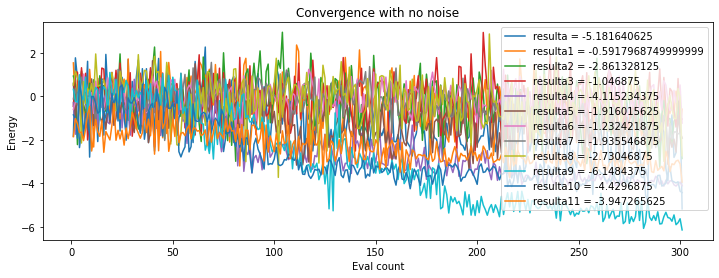

In [149]:
pylab.rcParams['figure.figsize'] = (12, 4)
pylab.plot(countsa, valuesa,label=f"resulta = {resulta.eigenvalue.real}")
pylab.plot(countsa1, valuesa1,label=f"resulta1 = {resulta1.eigenvalue.real}")
pylab.plot(countsa2, valuesa2,label=f"resulta2 = {resulta2.eigenvalue.real}")
pylab.plot(countsa3, valuesa3,label=f"resulta3 = {resulta3.eigenvalue.real}")
pylab.plot(countsa4, valuesa4,label=f"resulta4 = {resulta4.eigenvalue.real}")
pylab.plot(countsa5, valuesa5,label=f"resulta5 = {resulta5.eigenvalue.real}")
pylab.plot(countsa6, valuesa6,label=f"resulta6 = {resulta6.eigenvalue.real}")
pylab.plot(countsa7, valuesa7,label=f"resulta7 = {resulta7.eigenvalue.real}")
pylab.plot(countsa8, valuesa8,label=f"resulta8 = {resulta8.eigenvalue.real}")
pylab.plot(countsa9, valuesa9,label=f"resulta9 = {resulta9.eigenvalue.real}")
pylab.plot(countsa10, valuesa10,label=f"resulta10 = {resulta10.eigenvalue.real}")
pylab.plot(countsa11, valuesa11,label=f"resulta11 = {resulta11.eigenvalue.real}")
pylab.xlabel('Eval count')
pylab.ylabel('Energy')
pylab.title('Convergence with no noise')
pylab.legend()

The value changes slightly by re-running the vqe procedure, the closest groundstate I got was around -7.03, unfortunately that result got overwritten 

In [150]:
print(resulta9)
optpt = resulta9.optimal_point
print(resulta9.eigenvalue)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 250,
    'eigenstate': {   '00001': 0.04419417382415922,
                      '00011': 0.03125,
                      '00100': 0.10364452469860624,
                      '00101': 0.3336586953759785,
                      '00110': 0.3045873232752801,
                      '01000': 0.10364452469860624,
                      '01001': 0.42847841252506524,
                      '01010': 0.3657718722099883,
                      '01011': 0.0625,
                      '01100': 0.04419417382415922,
                      '01101': 0.14986973510352247,
                      '01110': 0.14320549046737,
                      '01111': 0.05412658773652741,
                      '10000': 0.0625,
                      '10001': 0.20252314682524564,
                      '10010': 0.184877493221863,
                      '10011': 0.05412658773652741,
                      '10100': 0.09882117688026186,
                      '10101': 0.2633171

In [152]:
init_pt = resulta9.optimal_point
init_pt = list(init_pt)
nansatz = ansatza9.copy()
#for i in range(nlayers):
nansatz = nansatz.bind_parameters({tparamsa9[0]:[init_pt[0]]})
init_pt.pop(0)
#bp
print(nansatz.draw())
print(len(init_pt))

           ┌───┐»
q371732_0: ┤ H ├»
           ├───┤»
q371732_1: ┤ H ├»
           ├───┤»
q371732_2: ┤ H ├»
           ├───┤»
q371732_3: ┤ H ├»
           ├───┤»
q371732_4: ┤ H ├»
           └───┘»
«           ┌────────────────────────────────────────────────────────────────────────────────┐»
«q371732_0: ┤0                                                                               ├»
«           │                                                                                │»
«q371732_1: ┤1                                                                               ├»
«           │                                                                                │»
«q371732_2: ┤2 analog_block(-0.381042579404329,5,[[0, 1], [1, 2], [2, 3], [3, 4]],1,1,1,1,1) ├»
«           │                                                                                │»
«q371732_3: ┤3                                                                               ├»
«           │                     

## Performance *with* noise

In [153]:
import os
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel
from qiskit.test.mock import FakeVigo
device_backend = FakeVigo()

backend = Aer.get_backend('aer_simulator')
noise_model = None
device = QasmSimulator.from_backend(device_backend)
coupling_map = device.configuration().coupling_map
noise_model = NoiseModel.from_backend(device)
basis_gates = noise_model.basis_gates

print(noise_model)
print()

algorithm_globals.random_seed = seed
qi = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed,
                     coupling_map=coupling_map, noise_model=noise_model,)

NoiseModel:
  Basis gates: ['cx', 'id', 'kraus', 'qerror_loc', 'quantum_channel', 'roerror', 'rz', 'save_amplitudes', 'save_amplitudes_sq', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_probabilities', 'save_probabilities_dict', 'save_stabilizer', 'save_state', 'save_statevector', 'save_statevector_dict', 'set_density_matrix', 'set_stabilizer', 'set_statevector', 'snapshot', 'sx', 'x']
  Instructions with noise: ['x', 'sx', 'id', 'cx', 'measure']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('cx', (3, 4)), ('cx', (4, 3)), ('cx', (3, 1)), ('cx', (1, 3)), ('cx', (1, 2)), ('cx', (2, 1)), ('cx', (0, 1)), ('cx', (1, 0)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]



In [ ]:
""" # T1 and T2 values for qubits 0-3
T1s = np.random.normal(50e3, 10e3, 4) # Sampled from normal distribution mean 50 microsec
T2s = np.random.normal(70e3, 10e3, 4)  # Sampled from normal distribution mean 50 microsec

# Truncate random T2s <= T1s
T2s = np.array([min(T2s[j], 2 * T1s[j]) for j in range(4)])

# Instruction times (in nanoseconds)
time_u1 = 0   # virtual gate
time_u2 = 50  # (single X90 pulse)
time_u3 = 100 # (two X90 pulses)
time_cx = 300
time_reset = 1000  # 1 microsecond
time_measure = 1000 # 1 microsecond

# QuantumError objects
errors_reset = [thermal_relaxation_error(t1, t2, time_reset)
                for t1, t2 in zip(T1s, T2s)]
errors_measure = [thermal_relaxation_error(t1, t2, time_measure)
                  for t1, t2 in zip(T1s, T2s)]
errors_u1  = [thermal_relaxation_error(t1, t2, time_u1)
              for t1, t2 in zip(T1s, T2s)]
errors_u2  = [thermal_relaxation_error(t1, t2, time_u2)
              for t1, t2 in zip(T1s, T2s)]
errors_u3  = [thermal_relaxation_error(t1, t2, time_u3)
              for t1, t2 in zip(T1s, T2s)]
errors_cx = [[thermal_relaxation_error(t1a, t2a, time_cx).expand(
             thermal_relaxation_error(t1b, t2b, time_cx))
              for t1a, t2a in zip(T1s, T2s)]
               for t1b, t2b in zip(T1s, T2s)]

# Add errors to noise model
noise_thermal = NoiseModel()
for j in range(4):
    noise_thermal.add_quantum_error(errors_reset[j], "reset", [j])
    noise_thermal.add_quantum_error(errors_measure[j], "measure", [j])
    noise_thermal.add_quantum_error(errors_u1[j], "u1", [j])
    noise_thermal.add_quantum_error(errors_u2[j], "u2", [j])
    noise_thermal.add_quantum_error(errors_u3[j], "u3", [j])
    for k in range(4):
        noise_thermal.add_quantum_error(errors_cx[j][k], "cx", [j, k])

print(noise_thermal) """

In [155]:
counts1 = []
values1 = []
def store_intermediate_result1(eval_count, parameters, mean, std):
    counts1.append(eval_count)
    values1.append(mean)

In [160]:
countsn2 = []
valuesn2 = []
def store_intermediate_resultn2(eval_count, parameters, mean, std):
    countsn2.append(eval_count)
    valuesn2.append(mean)

#### Since analog gates cannot be parameterized under noise, here I assigned the optimal time value which I got from the optimal parameters of the most efficicient ansatz

- Here I am also using the other optimal parameters as the initial point

In [158]:

#var_form = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
spsa = SPSA(maxiter=iterations)
vqe = VQE(nansatz, optimizer=spsa,initial_point=init_pt, callback=store_intermediate_result1, quantum_instance=qi)
result1 = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(f'VQE on Aer qasm simulator (with noise): {result1.eigenvalue.real:.5f}')
print(f'Delta from reference energy value is {(result1.eigenvalue.real - ref_value):.5f}')
print()

VQE on Aer qasm simulator (with noise): -0.25000
Delta from reference energy value is 7.46155



- Here I am not using the other optimal parameters as the initial point

In [163]:
spsa = SPSA(maxiter=iterations)
vqe = VQE(nansatz, optimizer=spsa, callback=store_intermediate_resultn2, quantum_instance=qi)
resultn2 = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(f'VQE on Aer qasm simulator (with noise): {resultn2.eigenvalue.real:.5f}')
print(f'Delta from reference energy value is {(resultn2.eigenvalue.real - ref_value):.5f}')
print()

VQE on Aer qasm simulator (with noise): -0.28516
Delta from reference energy value is 7.42639



- here I'll be taking different times in the interval t = -2 to 2 and choose the best out of them

In [164]:
countsn3 = []
valuesn3 = []
def store_intermediate_resultn3(eval_count, parameters, mean, std):
    countsn3.append(eval_count)
    valuesn3.append(mean)

In [166]:
spsa = SPSA(maxiter=iterations)
tinterval = np.linspace(-2,2,11) #Can be changed to get possibly even better results
emin = 10000
tmin = -2
for i in tinterval:
    ansatzn2 = ansatza9.bind_parameters({tparamsa9[0]:[i]})
    vqe = VQE(ansatzn2, optimizer=spsa, callback=store_intermediate_resultn3, quantum_instance=qi)
    resultn3 = vqe.compute_minimum_eigenvalue(operator=H2_op)
    temp = min(emin,resultn3.eigenvalue.real)
    if temp != emin:
        emin = temp
        tmin = i
countsn3 = []
valuesn3 = []
ansatzn2 = ansatza9.bind_parameters({tparamsa9[0]:[tmin]})
vqe = VQE(ansatzn2, optimizer=spsa,initial_point=init_pt, callback=store_intermediate_resultn3, quantum_instance=qi)
resultn3 = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(f'VQE on Aer qasm simulator (with noise): {resultn3.eigenvalue.real:.5f}')
print(f'Delta from reference energy value is {(resultn3.eigenvalue.real - ref_value):.5f}')
print()

VQE on Aer qasm simulator (with noise): -3.59375
Delta from reference energy value is 4.11780



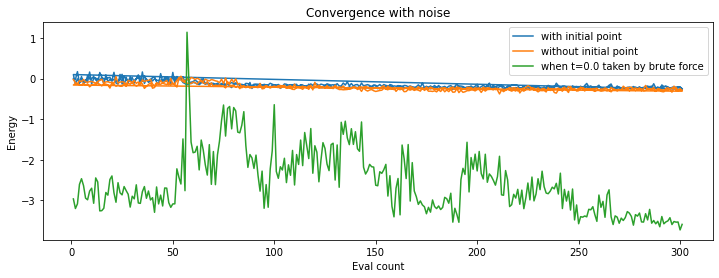

In [169]:
if counts1 or values1:
    pylab.rcParams['figure.figsize'] = (12, 4)
    pylab.plot(counts1, values1,label="with initial point")
    pylab.plot(countsn2,valuesn2,label="without initial point")
    pylab.plot(countsn3,valuesn3,label=f"when t={tmin} taken by brute force")
    pylab.xlabel('Eval count')
    pylab.ylabel('Energy')
    pylab.title('Convergence with noise')
    pylab.legend()

## Performance *with* noise and measurement error mitigation

In [171]:
from qiskit.utils.mitigation import CompleteMeasFitter

counts2 = []
values2 = []
if noise_model is not None:
    algorithm_globals.random_seed = seed
    qi = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed,
                         coupling_map=coupling_map, noise_model=noise_model, 
                         measurement_error_mitigation_cls=CompleteMeasFitter, 
                         cals_matrix_refresh_period=30)

    def store_intermediate_result2(eval_count, parameters, mean, std):
        counts2.append(eval_count)
        values2.append(mean)

    #ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
    spsa = SPSA(maxiter=iterations)
    vqe = VQE(ansatzn2, optimizer=spsa, callback=store_intermediate_result2, quantum_instance=qi)
    result2 = vqe.compute_minimum_eigenvalue(operator=H2_op)
    print(f'VQE on Aer qasm simulator (with noise and measurement error mitigation): {result2.eigenvalue.real:.5f}')
    print(f'Delta from reference energy value is {(result2.eigenvalue.real - ref_value):.5f}')

VQE on Aer qasm simulator (with noise and measurement error mitigation): -4.18555
Delta from reference energy value is 3.52600


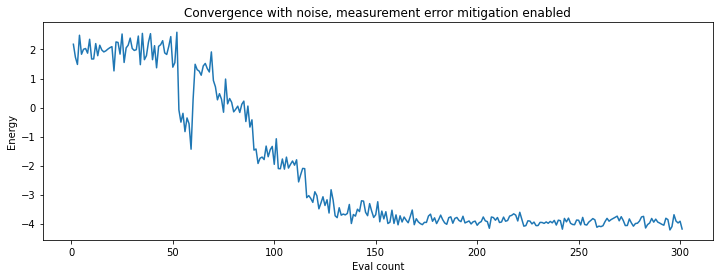

In [173]:
if counts2 or values2:
    pylab.rcParams['figure.figsize'] = (12, 4)
    pylab.plot(counts2, values2)
    pylab.xlabel('Eval count')
    pylab.ylabel('Energy')
    pylab.title('Convergence with noise, measurement error mitigation enabled')

Lets bring the results together here for a summary. 

We produced a reference value using a classical algorithm and then proceeded to run VQE on a qasm simulator. While the simulation is ideal (no noise) there is so called shot-noise due to sampling - increasing the number of shots reduces this as more and more samples are taken, but shots was left at the default of 1024 and we see a small effect in the outcome. 

Then we added noise using a model taken off a real device and can see the result is affected. Finally we added measurement noise mitigation which adjusts the results in an attempt to alleviate the affect of noise in the classical equipment measuring the qubits.

In [174]:
print(f'Reference value: {ref_value:.5f}')
print(f'VQE on Aer qasm simulator (no noise): {resulta9.eigenvalue.real:.5f}')
print(f'VQE on Aer qasm simulator (with noise): {resultn3.eigenvalue.real:.5f}')
print(f'VQE on Aer qasm simulator (with noise and measurement error mitigation): {result2.eigenvalue.real:.5f}')

Reference value: -7.71155
VQE on Aer qasm simulator (no noise): -6.14844
VQE on Aer qasm simulator (with noise): -3.59375
VQE on Aer qasm simulator (with noise and measurement error mitigation): -4.18555


Hence, although the digital-analog approach seems to work flawlessly for smaller sized problem hamiltonians, At a larger size the results seem to be not that appealing, although a further investigation is required as to what seems to be the problem, the main issue seems to be the inability of ansatzes to reach the global minima.
- As opposed to what one would initially think that increasing the number of layers/gates (more parameters) would lead to a higher coverage of the hilbert space, it seems like although that may be true, but that would also imply the higher probability of getting stuck in a local minima. Specialized Initial states/ Problem specific ansatze analysis may be one way of tackling the same.

In our case the winner ansatze was the simplest to construct with simple $Z_{j}Z_{j+1}$ terms in the analog gate in which the h_coefficients were not parameterized and the same time was used for multiple occurences of the analog gate

Remaining-
- test with other noise models
- try on other hamiltonians like T-Ising or other molecules

Name - Vinamr Jain
Team Name - Qiskit for the biscuit
Team Members - Vinamr Jain (Pitch Presenter)
Discord - FruitsPunchSamuraiSama#0715
Github - https://github.com/VinamrJain
Contact Email - vinamrjain2002@gmail.com
Name of Challenge - Digital-Analog Variational Quantum Eigensolver (IQM)

### Please go through the markdown written in the jupyter notebook files to get the remarks conclusions etc. (I'm sorry but I'm very clumsy when it comes to these things)